/tmp/ipykernel_147716/1959176573.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(merged_df['Nodes'], merged_df['Score'], yerr=merged_df['Error'], fmt='o-', ecolor='red', capsize=5, linestyle='-', color='blue', label='Score with Confidence Interval')


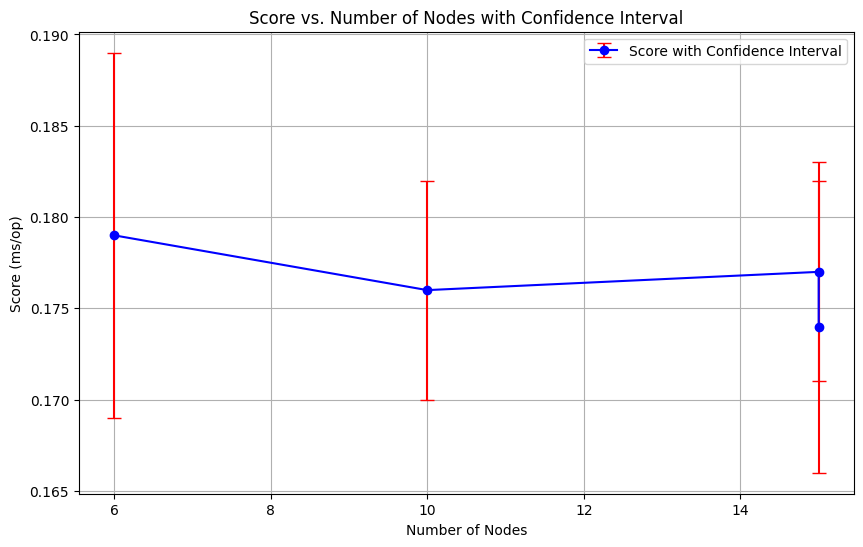

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Încărcarea datelor din fișiere
benchmark_results_path = './Benchmark_VertexCoverTree.csv'
graph_test_data_path = './Graph_Test_Data.csv'

benchmark_results_df = pd.read_csv(benchmark_results_path)
graph_test_data_df = pd.read_csv(graph_test_data_path)

# Uniformizarea coloanei TestNumber pentru a include prefixul 'Test '
benchmark_results_df['TestNumber'] = benchmark_results_df['TestNumber'].apply(lambda x: f'Test {x}')
graph_test_data_df['TestNumber'] = graph_test_data_df['TestNumber'].apply(lambda x: str(x))

benchmark_results_df['Error'] = benchmark_results_df['Error'].str.replace('±', '').str.strip().astype(float)

merged_df = pd.merge(graph_test_data_df, benchmark_results_df, on='TestNumber')

# Sortarea datelor în funcție de 'Nodes' în ordine crescătoare
merged_df = merged_df.sort_values(by='Nodes', ascending=True)

merged_df['Score'] = pd.to_numeric(merged_df['Score'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.errorbar(merged_df['Nodes'], merged_df['Score'], yerr=merged_df['Error'], fmt='o-', ecolor='red', capsize=5, linestyle='-', color='blue', label='Score with Confidence Interval')
plt.title('Score vs. Number of Nodes with Confidence Interval')
plt.xlabel('Number of Nodes')
plt.ylabel('Score (ms/op)')
plt.grid(True)
plt.legend()
plt.show()